In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import mean_squared_error

In [4]:
a1 = np.array([1,2,3]); a2 = np.array([4,5,6])
A = np.column_stack((np.array([1]*3), a1, a2))
A

array([[1, 1, 4],
       [1, 2, 5],
       [1, 3, 6]])

In [7]:
np.linalg.pinv(A.T @ A)

array([[ 0.21349862, -0.47933884,  0.16115702],
       [-0.47933884,  1.08264463, -0.3553719 ],
       [ 0.16115702, -0.3553719 ,  0.12809917]])

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [9]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
Y = reg(X) + np.random.normal(0, 5, 100)

# Create DataFrame
Sim_1 = pd.DataFrame({'X': X, 'Y': Y})

In [10]:
# Split into training and testing sets
Train_set = Sim_1.iloc[:80]
Test_set = Sim_1.iloc[80:]

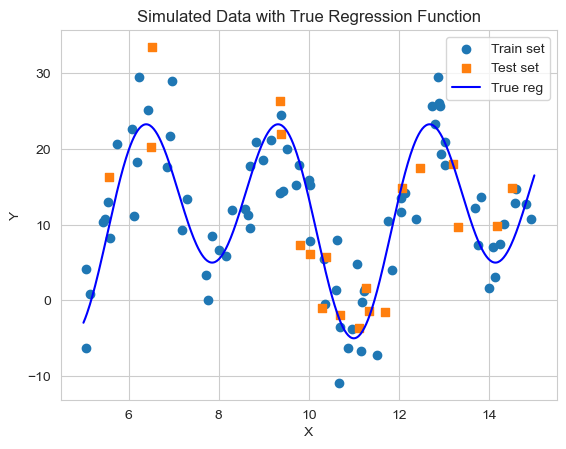

In [11]:
# Plot the training and testing points
plt.scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
plt.scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

## Local linear regression from scratch

In [3]:
# Gaussian Kernel
def gaussian(x):
    return np.exp(-0.5*x**2)

# Uniform kernel
def rect(x):
    x = np.array(x)
    return np.where(abs(x) <= 1, 1, 0)

# Traingular kernel
def triangular(x):
    x = np.array(x)
    return np.where(abs(x) <= 1, 1 - abs(x), 0)

In [28]:
def local_reg(x0, X_train, Y_train, kernel = gaussian, h = h):

    n = Train_set.shape[0]
    B = np.column_stack(([1]*n, x0 - Train_set['X'])) # (x0 - Train_set['X'])**2, Add higher degree terms for higher polynomials
    W = np.diag(kernel((x0 - X_train)/h))
    b = np.array([1,0]) # Add 0s to use higher degree polynomials
    
    return b @ np.linalg.pinv(B.T @ W @ B) @ B.T @ W @ Y_train

In [10]:
y_curve_local_reg = [local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y']) for x0 in x_curve]

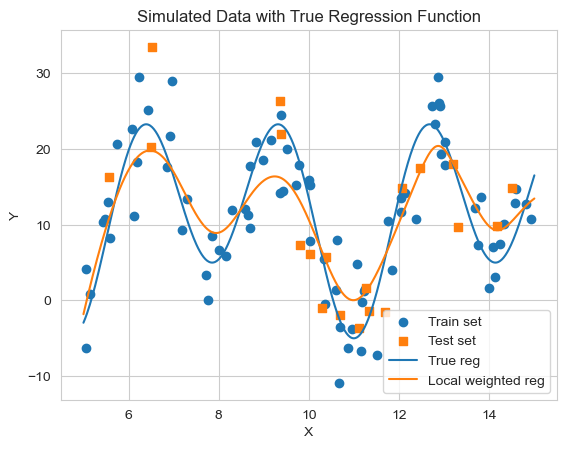

In [17]:
# Plot the training and testing points
plt.scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
plt.scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500)
y_curve = reg(x_curve)
y_curve_local_reg = [local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = 0.5) for x0 in x_curve]

plt.plot(x_curve, y_curve, label='True reg')
plt.plot(x_curve, y_curve_local_reg, label='Local weighted reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

In [18]:
y_train = Train_set['Y']
y_test = Test_set['Y']

y_pr_trn = np.array([local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = 0.5) for x0 in Train_set['X']])
y_pr_tst = np.array([local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = 0.5) for x0 in Test_set['X']])

trn_mse = mean_squared_error(y_train, y_pr_trn)
tst_mse = mean_squared_error(y_test, y_pr_tst)

print('Train MSE: ', trn_mse)
print('Test MSE: ', tst_mse)

Train MSE:  23.433059138869872
Test MSE:  32.12893488834185


### Repeat the procedure 50 times and plot the average train and test MSEs for various values of h

In [ ]:
h= 0

In [29]:
# fig, ax = plt.subplots(nrows=125, ncols=2, figsize=(12, 40))  # 50 plots total
# ax = ax.flatten()
tr_Mse = []
ts_Mse = []
H = range(1,25,5)
for h in H:
    trn_mse = []
    tst_mse = []
    
    for i in range(50):
        # Generate data
        X = np.random.uniform(5, 15, 100)
        Y = reg(X) + np.random.normal(0, 5, 100)
        
        # Create DataFrame
        Sim_1 = pd.DataFrame({'X': X, 'Y': Y})
        Train_set = Sim_1.iloc[:80]
        Test_set = Sim_1.iloc[80:]
        
        # Prepare curve points
        x_curve = np.linspace(5, 15, 500)
        y_true = reg(x_curve)
        y_local = [local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h=h) for x0 in x_curve]
        
        # Plot data points
        # ax[i].scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
        # ax[i].scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')
        
        # # Plot curves
        # ax[i].plot(x_curve, y_true, color='blue', label='True reg')
        # ax[i].plot(x_curve, y_local, color='red', label='Local weighted reg')
        
        # # Labels, title, legend, grid
        # ax[i].set_xlabel('X')
        # ax[i].set_ylabel('Y')
        # ax[i].set_title(f'Simulation {i+1}')
        # ax[i].legend(fontsize=8)
        # ax[i].grid(True)
    
        y_train = Train_set['Y']
        y_test = Test_set['Y']
        
        y_pr_trn=np.array([local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = h) for x0 in Train_set['X']])
        y_pr_tst=np.array([local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = h) for x0 in Test_set['X']])
        
        trn_mse.append(mean_squared_error(y_train, y_pr_trn))
        tst_mse.append(mean_squared_error(y_test, y_pr_tst))
    tr_Mse.append(np.mean(trn_mse))
    ts_Mse.append(np.mean(tst_mse))
    print(f'Avg. Train MSE for h={h}: ', np.mean(trn_mse))
    print(f'Avg. Test MSE for h={h}: ', np.mean(tst_mse))

# plt.tight_layout()
# plt.show()

Avg. Train MSE for h=1:  62.27546921218236
Avg. Test MSE for h=1:  74.26846264573551
Avg. Train MSE for h=6:  90.59035828009718
Avg. Test MSE for h=6:  97.57930577991011
Avg. Train MSE for h=11:  90.52274410046694
Avg. Test MSE for h=11:  93.74773575256587
Avg. Train MSE for h=16:  92.16687858334372
Avg. Test MSE for h=16:  100.45720862801909
Avg. Train MSE for h=21:  86.67032705478165
Avg. Test MSE for h=21:  90.19874223834417


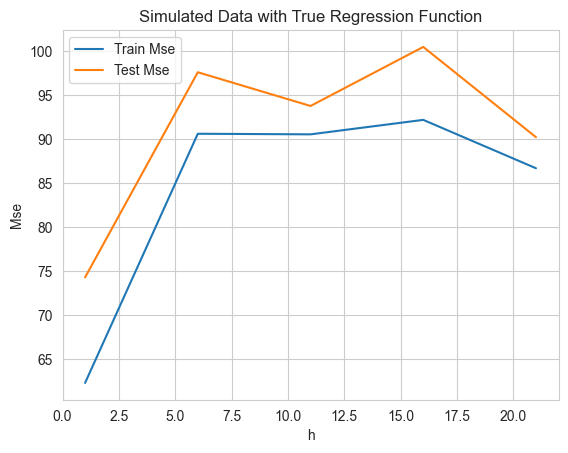

In [30]:
plt.plot(H,tr_Mse, label='Train Mse')
plt.plot(H, ts_Mse, label='Test Mse')

plt.xlabel('h'); plt.ylabel('Mse')
plt.legend()
plt.title('Simulated Data with True Regression Function')
plt.show()